In [1]:
# サンプルコード
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("4マスの板に小麦を並べる（リスト）：{}".format(small_board_list))

4マスの板に小麦を並べる（リスト）：[1, 2, 4, 8]


In [2]:
# サンプルコード
import numpy as np

small_board_ndarray = np.array(small_board_list)
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


### 【問題1】2×2マスのチェス盤の小麦の数

In [3]:
print('2×2マスのチェス盤に小麦を並べる')
print(small_board_ndarray.reshape([2,2]))

2×2マスのチェス盤に小麦を並べる
[[1 2]
 [4 8]]


### 【問題2】n×mマスへの拡張

In [4]:
def wheat_chessboard(n, m):
    n_squares = n*m
    small_board_list = [1]
    for _ in range(n_squares - 1):
        small_board_list.append(2*small_board_list[-1])
    return np.array(small_board_list).reshape([n,m])

chessboard_8x8 = wheat_chessboard(8,8)
print('8×8マスのチェス盤に小麦を並べる')
print(chessboard_8x8)

8×8マスのチェス盤に小麦を並べる
[[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]
 [2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
  4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04]
 [6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
  1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06]
 [1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
  2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09]
 [4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
  6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11]
 [1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
  1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14]
 [2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
  4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16]
 [7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
  1.15292150e+18 2.30584301e+18 4.61168602e+1

### 【問題3】小麦の数の合計

In [5]:
print(f'8×8マスのチェス盤の小麦の数の合計：{np.sum(chessboard_8x8)}')

8×8マスのチェス盤の小麦の数の合計：1.8446744073709552e+19


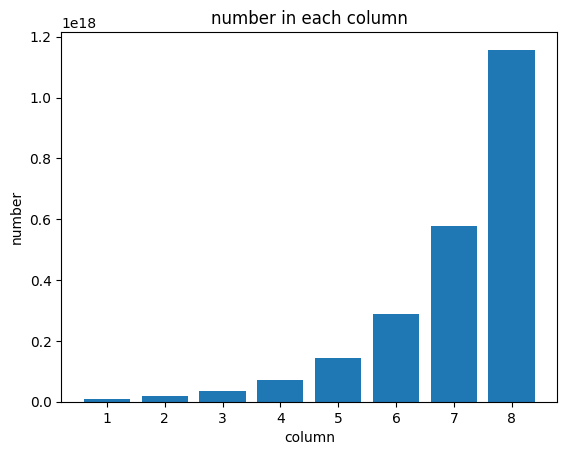

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(np.arange(1,9), np.mean(chessboard_8x8, axis=0))
plt.show()

### 【問題4】小麦の数のヒートマップ

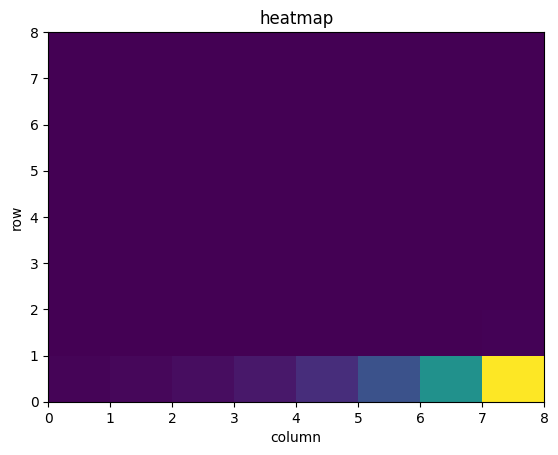

In [7]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(chessboard_8x8[::-1])
plt.show()

### 【問題5】後半は前半の何倍か

In [8]:
print(f'チェス盤の後半にある小麦の数は前半の {np.sum(chessboard_8x8[4:]) / np.sum(chessboard_8x8[:4])} 倍')

チェス盤の後半にある小麦の数は前半の 4294967296.0 倍


### 【問題6】他の計算方法によるn×mマスへの拡張

In [9]:
# np.append()を使った関数
def wheat_chessboard2(n, m):
    n_squares = n*m
    small_board_ndarray = np.array([1]).astype(np.uint64)
    times = np.array([2]).astype(np.uint64)
    for _ in range(n_squares - 1):
        small_board_ndarray = np.append(small_board_ndarray, times*small_board_ndarray[-1])
    return small_board_ndarray.reshape([n,m])

print(wheat_chessboard2(8,8))

[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664     140737488355328

In [10]:
# ブロードキャストを使った関数
def wheat_chessboard3(n, m):
    n_squares = n*m
    indices_of_squares = np.arange(n_squares).astype(np.uint64)
    small_board_ndarray = 2**indices_of_squares
    return small_board_ndarray.reshape([n,m])

print(wheat_chessboard3(8,8))

[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664     140737488355328

### 【問題7】計算時間の比較

In [11]:
%%timeit
# リストのappendを使った関数
wheat_chessboard(8,8)

12.3 µs ± 812 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [12]:
%%timeit
# np.append()を使った関数
wheat_chessboard2(8,8)

325 µs ± 23.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [13]:
%%timeit
# ブロードキャストを使った関数
wheat_chessboard3(8,8)

5.43 µs ± 236 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


np.appendはリストのappendよりも10倍以上時間がかかっているため、処理時間を短縮する場合はndarrayをリストに変換してからappnedするのが有効だと考えられる。